# Student Grades Prediction in Light of The Pandemic 
# ***Exploring factors that affect students' final math grade***
## Group Project
## *Introduction*
With the emergence of the pandemic, the world we know has changed in almost any and every way imaginable. For students, the pandemic meant a shift to remote schooling, where classes were taught online and classrooms could only connect through a screen. While classrooms are beginning to open up again, we have seen lingering effects of the pandemic on student education. A recent report published by McKinsey shows the impact on K-12 students was significant, leaving them on average 5 months behind in Mathematics and 4 months behind in reading by the end of the school year. The effects of the pandemic on student learning is significant, and will continue to have lingering effects as the world begins to recover from COVID-19.
 
In light of this situation, our team chose to analyze a student performance dataset in which we explore which factors had the greatest influence on a student's final math grade. Our question of analysis is as follows:
 
“What factors have the greatest impact on secondary students’ final mathematics grade?”
 
To explore this question, we have selected the Student Performance Data Set, which explores student achievement in two Portuguese secondary schools. This dataset provides information on student’s grades in two subjects: Mathematics and Portuguese language. Given the pandemic has most severely impacted students’ learning in mathematics, we have chosen to focus our analysis solely on student’s mathematics grades. Further, the information in our dataset was reported in the 2005-2006 school year; we chose this specifically to study impacts on student mathematics grades in a pre-pandemic time. Now that classrooms are primarily in-person again, pre-pandemic factors that influence grades are more relevant than factors that arose during the pandemic such as Zoom learning or WiFi connectivity that would influence student grades. 
 
To analyze our question, we will be performing linear regression analyses, as we seek to utilize quantitative variables to predict students’ final math grade (denoted in the dataset as G3). A detailed explanation of our target variable and predicted attributes is provided below:
 
Target Variable:
+ G3: Student’s final mathematics grade. This data is on a scale of 0-20, with 0 the lowest grade and 20 representing a perfect score.
 
Predictor Variables: (All predictor variables were numeric values. Non-numeric variables were discarded.)

+ failures: The number of past class failures a student has had. Numeric: n if 1<=n<3, else 4)
+ medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
+ fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

The data we used is called [Student Performance]( https://archive.ics.uci.edu/ml/datasets/student+performance) which can be found by going on the link provided.

![student performance](https://user-images.githubusercontent.com/90440745/140980802-033a00bf-2f76-46d0-b4ad-947bb7379b0d.jpeg)

Figure 1: A Cartoon Data Analyst

In [26]:
library(tidyverse)
library(repr)
library(tidymodels)
#library(gridExtra)
#library(rvest)
#library(readxl)
#library(digest) 
#library(ggplot2)

In [27]:
set.seed(1234)
#setting the seed at the beginning in order to have randomized reproducible data 
#Reading data into Jupyter
temp <- tempfile()
temp2 <- tempfile()

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"

# Downloading the file as a zip
download.file(url, temp)

# Unzipping the file
unzip(zipfile = temp, exdir = temp2)

# Reading the file into R
student_data_raw <- read_csv2(file.path(temp2, "student-mat.csv"))

unlink(c(temp, temp2))

# We now have the raw student data file in R
head(student_data_raw)



Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


Figure 2: The Raw Data on Portuguese students

In [54]:
#Cleaning the data

student_data <- student_data_raw %>% 

# We clean the data by eliminating the columns we dont need for this analysis
# Potential predictors are all the quantitative variables in the dataset
# Selecting quantative attributes we would like as potential predictors and selecting what we want to predict, the final grade or G3
    select(failures, Medu, Fedu, G3) %>% 
# Renaming G3 as final math grade to make it more clear
    rename(final_math_grade = G3)

head(student_data)

failures,Medu,Fedu,final_math_grade
<dbl>,<dbl>,<dbl>,<dbl>
0,4,4,6
0,1,1,6
3,1,1,10
0,4,2,15
0,3,3,10
0,4,3,15


Figure 3: A glimpse of the Tidied Student Data with our selected Predicted Variables

The above data is tidy because all three criteria for tidy data have now been met:

1)All the variables (failures,  Medu, Fedu, G3) are now their own columns in the data frame.

2)Each observation, i.e. failures, Medu, Fedu,  G3, are in a single row.

3)Each value is a single cell, i.e., its row, column position in the data frame is not shared with another value.

We chose the attribute failures because according to visual analysis in our proposal, it had the strongest correlation with student final math grades.

 
As a linear regression was going to be performed, only numeric variables were chosen, and non-numeric character <chr> variables were discarded. Although all of the chosen variables are numerical <dbl> values, many of them represent categories defined for each whole number, making them categorical variables. One example is health, which was recorded on a scale of 1-5 which does not allow for values beyond that defined scale (there cannot be decimal places). For the purposes of plotting a linear regression, we have assumed that these values are quantitative. This affects the way points are dispersed on the graph, but because there are a range of potential numeric values for each variable, it is still possible to graph them. After the testing data has been analyzed, the final quantitative values will be converted back to categorical values by rounding up or down to the nearest whole number so our predictions can be compared to the actual grades. 

In [40]:
#Splitting into testing and training data
#We chose to have 75% training data and 25% testing data

student_split <- initial_split(student_data, prop = 0.75, strata = final_math_grade)
student_training <- training(student_split)
student_testing <- testing(student_split)

In [56]:
#Setting up Linear Regression Model

student_spec <- linear_reg() %>% 
      set_engine("lm") %>%
      set_mode("regression")

Each of the variables were individually compared to the final math grade to determine the best predictors during the proposal. They were not compared in combinations with one another (using multiple regression) and the final math grade because it would be more difficult to compare the coefficients of the graph alone than to compare coefficients with an accompanying visualization. It is possible that certain combinations of predictors have an even lower RMSE than the lowest we found individually, so there is potential to extend our analysis in the future. 

In [57]:
#Failures as a Predictor Variable for Student Final Math Grade 
#failures - number of past class failures (numeric: n if 1<=n<3, else 4)

options(repr.plot.width=10, repr.plot.height=7)

#Choosing the failures column to compare it to the final math grade, using training data
student_recipe_failures <- recipe(final_math_grade ~ failures, data = student_training)

#Setting up the workflow to create the model with training data
student_best_fit_failures <- workflow() %>%
        add_recipe(student_recipe_failures)%>%
        add_model(student_spec)%>%
        fit(data = student_training)

student_best_fit_failures

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     failures  
     11.009       -2.217  


In [58]:
#Finding RMSE of failures model

#RMSE measures the Root Mean Squared Error of the prediction with training data
#Here

failures_rmse_training <- student_best_fit_failures %>%
                predict(student_training) %>%
                bind_cols(student_training) %>%
                metrics(truth = final_math_grade, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()

# we did not use step_scale and step_center because our data is already on standardized scale. hence additional standardization functions would be redundant.

failures_rmse_training

[1] 4.348862

#

`geom_smooth()` using formula 'y ~ x'



[1] 4.029154

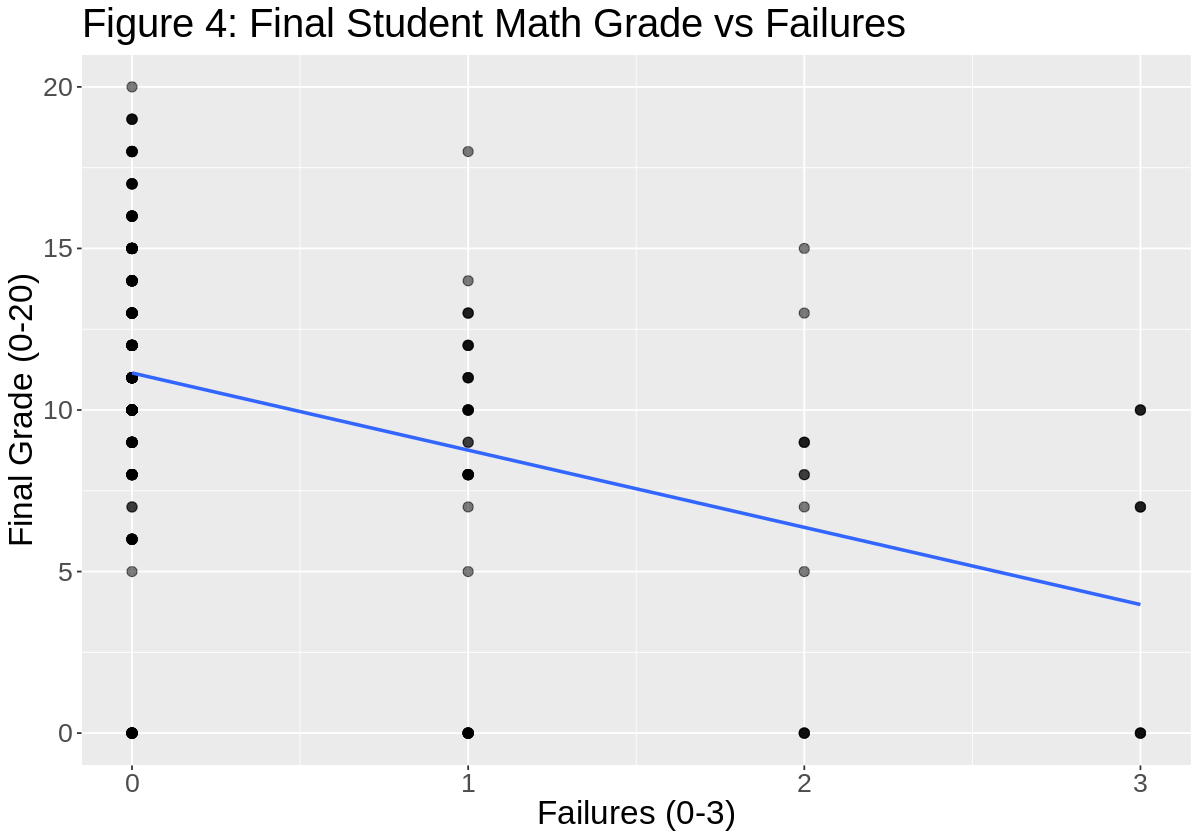

In [29]:
#Finding RMSPE of failures model

#RMSPE measures the Root Mean Squared Prediction Error of the prediction with testing data

failures_rmspe_testing <- student_best_fit_failures %>%
                predict(student_testing) %>%
                bind_cols(student_testing) %>%
                metrics(truth = final_math_grade, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
#Graph of Failures vs Final Math Grade with training data

failures_graph <- student_training %>%  
    ggplot(aes(x=failures, 
               y= final_math_grade)) +
        labs(x = "Failures (0-3)", 
             y = "Final Grade (0-20)") + 
        geom_point(size = 2.5, alpha = 0.5) +
        geom_smooth(method = "lm", se = FALSE)+
        theme(text = element_text(size = 20))+
        ggtitle("Figure 4: Final Student Math Grade vs Failures")

failures_graph
failures_rmspe_testing

In [60]:
#Selecting the final math grade and the testing data
grade_data<-select(student_testing, final_math_grade)

#Predicting the failures based off of the model created with training data, this time with testing data
failures_rmspe_testing_result<- student_best_fit_failures %>%
                predict(student_testing)

#Rounding the predictions to whole numbers so they can be compared to the original data
rounded_failures_result<-round(failures_rmspe_testing_result, digits=0)

#selecting failures from the testing data
failure<- select (student_testing,failures)

#Creating a dataframe with the testing data that was modified above
failures_data<-data.frame(failure,rounded_failures_result, grade_data)

#Getting a quick glimpse of the data
head(failures_data)

options(repr.plot.width=10, repr.plot.height=7)


,failures,.pred,final_math_grade
,<dbl>,<dbl>,<dbl>
1,0,11,6
2,0,11,15
3,0,11,14
4,0,11,15
5,0,11,15
6,2,7,8


Figure 5: A glimpse of the predicted failures from the testing data

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



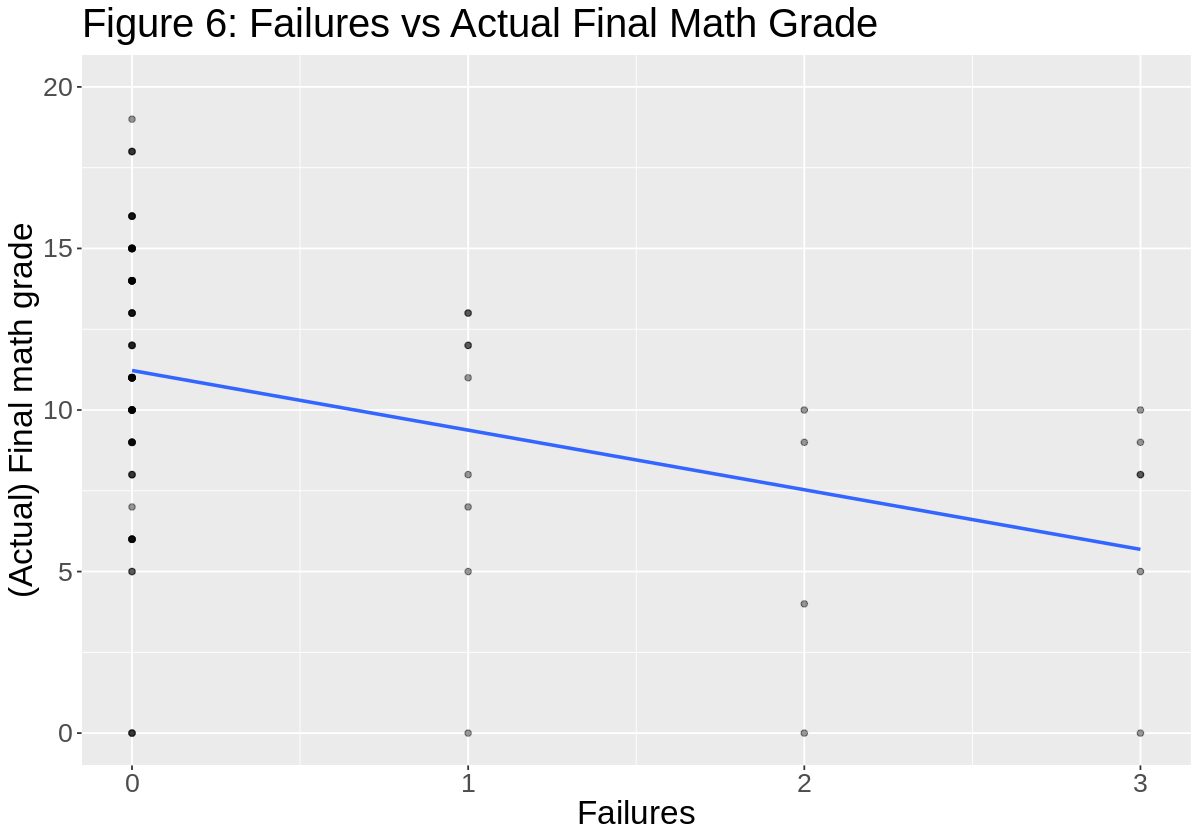

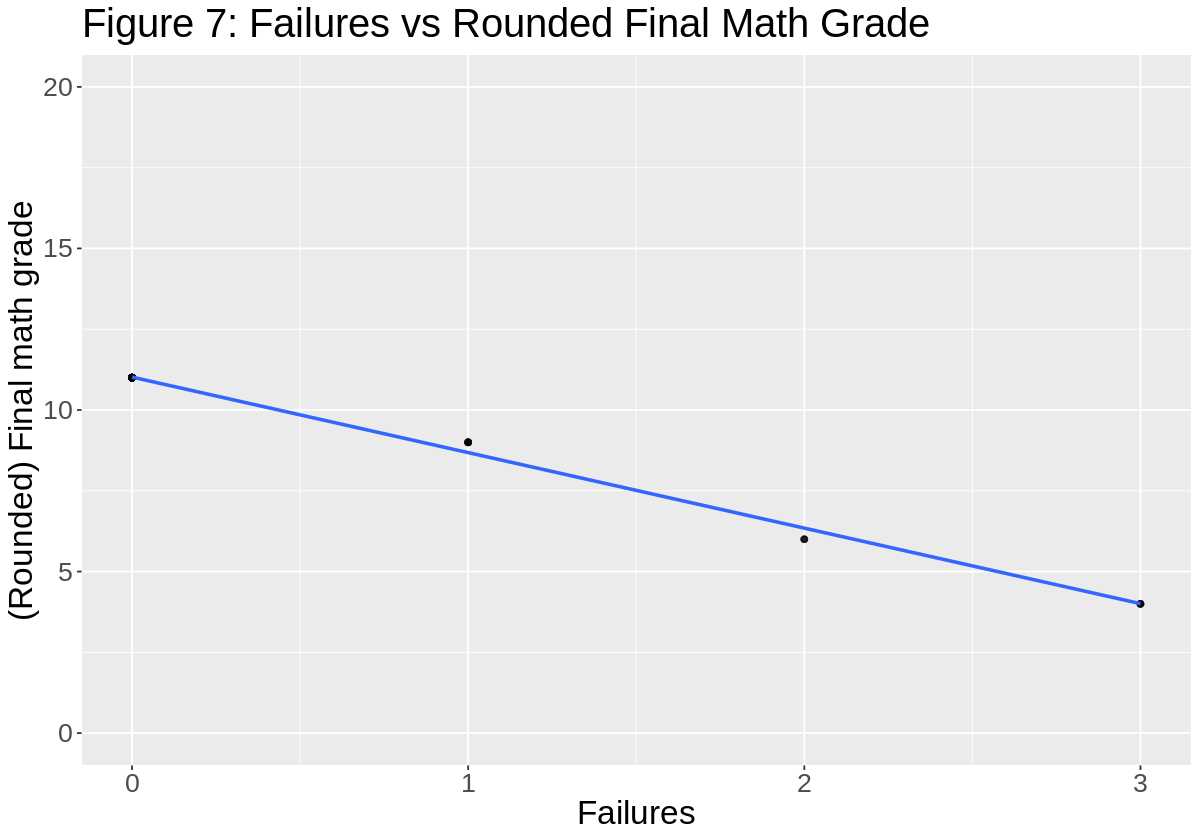

In [37]:
#Creating a plot of the actual final math grade using failures and the final math grade from the testing data 
lm_plot_final_1 <- ggplot(failures_data, aes(x = failures, y = final_math_grade)) +
  geom_point(alpha = 0.4) +
  xlab("Failures") +
  ylab("(Actual) Final math grade") +
geom_smooth(method = "lm", se = FALSE)+xlim(0,3)+ylim(0,20)+
theme(text = element_text(size = 20))+
ggtitle("Figure 6: Failures vs Actual Final Math Grade")

#Creating a plot of the final math grade using data that has been rounded to whole numbers and the predicted grades
lm_plot_final_2 <- ggplot(failures_data, aes(x = failures, y = .pred)) +
  geom_point(alpha = 0.4) +
  xlab("Failures") +
  ylab("(Rounded) Final math grade")+
        geom_smooth(method = "lm", se = FALSE)+
xlim(0,3)+ylim(0,20)+
theme(text = element_text(size = 20))+
ggtitle("Figure 7: Failures vs Rounded Final Math Grade")

lm_plot_final_1
lm_plot_final_2

In [32]:

coeffs <- student_best_fit_failures %>% 
             pull_workflow_fit() %>% 
             tidy()
coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),11.146859,0.2777051,40.139188,9.043809e-122
failures,-2.389319,0.3543778,-6.742292,8.164427e-11


Figure 8: Table of the Coefficients showing failures

Our coefficients are (intercept)  $β_0$= 11.147  and slope  $β_1$ = -2.389 

This means that the equation of the line of best fit is $final math grade = 11.147 - 2.389*(number  of  past  class  failures)$

The model predicts that grades start at 11.147 for 0 past class failures, and that every extra class failure decreases the grade by 2.389

In [63]:

student_test_results <- student_best_fit_failures %>%
  predict(student_testing) %>%
  bind_cols(student_testing) %>%
  metrics(truth = final_math_grade, estimate = .pred)

# sameas failures_rmspe
student_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.020939
rsq,standard,0.226447
mae,standard,3.253616


Figure 9: Table including RMSE of the test results

In [70]:
#MOTHER'S EDUCATION

#7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3- secondary education or 4- higher education)
#absences, health, freetime, studytime, failures, traveltime, age, Medu, Fedu, Dalc, Walc, famrel, goout

options(repr.plot.width=10, repr.plot.height=7)

student_recipe_Medu <- recipe(final_math_grade ~ Medu, data = student_training)

student_best_fit_Medu <- workflow() %>%
        add_recipe(student_recipe_Medu)%>%
        add_model(student_spec)%>%
        fit(data = student_training)



In [71]:
Medu_rmse_training <- student_best_fit_Medu %>%
                predict(student_training) %>%
                bind_cols(student_training) %>%
                metrics(truth = final_math_grade, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
# we did not use step_scale and step_center because our data is already on standardized scale. hence additional standardization functions would be redundant.

Medu_rmse_training

[1] 4.514715

#

In [72]:
#FATHER'S EDUCATION

#8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3- secondary education or 4- higher education)
#absences, health, freetime, studytime, failures, traveltime, age, Medu, Fedu, Dalc, Walc, famrel, goout

options(repr.plot.width=10, repr.plot.height=7)

student_recipe_Fedu <- recipe(final_math_grade ~ Fedu, data = student_training)

student_best_fit_Fedu <- workflow() %>%
        add_recipe(student_recipe_Fedu)%>%
        add_model(student_spec)%>%
        fit(data = student_training)



In [73]:
Fedu_rmse_training <- student_best_fit_Fedu %>%
                predict(student_training) %>%
                bind_cols(student_training) %>%
                metrics(truth = final_math_grade, estimate = .pred) %>%
                filter(.metric == 'rmse') %>%
                select(.estimate) %>%
                pull()
# we did not use step_scale and step_center because our data is already on standardized scale. hence additional standardization functions would be redundant.

Fedu_rmse_training

[1] 4.557743

#

In [74]:
all_rmse_training<-c( failures_rmse_training,  Medu_rmse_training, Fedu_rmse_training)

all_rmse_training[order(all_rmse_training)]



[1] 4.348862 4.514715 4.557743

The above mentioned 3 min_rmse refers to the failure_rmse_training, Medu_rmse_training and Fedu_rmse_training.

## *Methods*

+ The data was uploaded onto Github by using the link to the raw .csv file to download to the Jupyter Notebook. Before reading our file we downloaded the following libraries: tidyverse, repr, tidymodels. Tidyverse was important for functions like select and ggplot for the process of cleaning the dataset and making visualizations. Tidymodels is important for functions like workflow(), recipe() to model our data. 
+ We set the seed at the beginning in order to have randomized reproducible data.
+ We load the data to our notebook from github using the read_csv function.
+ We filter the data by eliminating the columns we do not need for this analysis using the select function and keeping only the columns failures and G3. We then rename the G# column to final_math_grade to make it easier for us to access and understand it.
+ Next we view the data using the head function to only see the first few rows of the data.
+ We split the data into training and testing data sets in the proportion of 75% training data and 25% testing data, by having the 75% training dat we expect our model to learn from the giving training data and the 25% is used to test our model with the data never seen by the model before and get adequate results.
+ Next we set up a linear regression model and compare the failures to the final math grade. We found this through our proposal after shortlisting the predictors with the lowest RMSE.
+ We create a recipe using the recipe function with final_math_grade as target variable and failures as predictor variable. Next we create a model of the training data using the workflow() function.
+ Our next step is to find the RMSE of the failures model that we created using the training data, hich comes out to be 4.3461. After this we find the RMSPE of the failures model using our testing data, which comes out to be 4.0291
+ We visualize the training data using a scatter plot with a linear regression line with appropriate readable axis labels using the ggplot function.
+ Our next step is to visualize the model predictions of the final_math_grade against the failures values and compare it to out values of the original final_math_grade.
+ We then calculate the equation of the line of best fit from the intercept values and the slope values that we get from our model by fitting the data to the training data.


## *Results*

Our model equation is as follows: 
𝑓𝑖𝑛𝑎𝑙 𝑚𝑎𝑡ℎ 𝑔𝑟𝑎𝑑𝑒=11.147−2.389∗(𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑎𝑠𝑡 𝑐𝑙𝑎𝑠𝑠 𝑓𝑎𝑖𝑙𝑢𝑟𝑒𝑠)

We found that the failure model was the most accurate at predicting the students' final math grade. 

## *Discussion*

When we conducted our preliminary analysis, we found a stronger correlation between some of the attributes we investigated and final mathematics grade. The predictors that had the strongest correlation with final mathematics grade were number of student failures (correlation coefficient of -1.51), which demonstrated a strong negative correlation and a low RMSPE value (4.03), and mothers education and fathers education, both of which demonstrated a positive correlation and low RMSPE values (4.16 and 4.25 respectively). The strongest correlation out of these top attributes was that between final mathematics grade and the number of student failures, with a negative correlation coefficient of -1.51. This gives us insight in that the attribute with the strongest correlation with final mathematics grade, seen from our analysis to be number of student failures, helped us build the best model to predict final mathematics grade. 
Our findings mostly match our predictions. One factor we mispredicted was the correlation between age and final mathematics grade, which actually demonstrated a negative correlation rather than a positive correlation as we expected. Our prediction based on the maturing mind was likely inaccurate or outweighed by the difficulty of schoolwork which increases as a student ages. 

Using the attribute with the strongest correlation with final mathematics grade as its predictor allowed us to find a relatively strong model for students’ final mathematics grade. Having a model such as this can indicate to students what habits they can change and how much they need to change their habits in order to increase their final mathematics grade by a certain amount. For example, given that number of failures has the strongest correlation with final mathematics grade (and is thee factor we based our model upon) compared to another factor such as workday alcohol consumption, a student would have an indication that their past failures would likely impact their grade in more a significant manner than consumption of alcohol during workdays. Our model also allows students to know how much a past failure would impact their grade, helping them work toward specific performants goals. 

Our model equation is as follows: 
𝑓𝑖𝑛𝑎𝑙 𝑚𝑎𝑡ℎ 𝑔𝑟𝑎𝑑𝑒=11.147−2.389∗(𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑎𝑠𝑡 𝑐𝑙𝑎𝑠𝑠 𝑓𝑎𝑖𝑙𝑢𝑟𝑒𝑠)

Given the effects of the pandemic on student learning and the lingering educational backtracks many students are facing as discussed earlier, knowling which habits they can focus on to boost their performance the most is critical.
Each of the variables were individually compared to the final math grade to determine the best predictors. They were not compared in combinations with one another (using multiple regression) and the final math grade because it would be more difficult to compare the coefficients of the graph alone than to compare coefficients with an accompanying visualization. It is possible that certain combinations of predictors have an even lower RMSE than the lowest we found individually, so there is potential to extend our analysis in the future. 

Our findings can lead to future research regarding the particularities of attributes that effect grades beyond mathematics grade. For example, given that number of failures is  strong predictor and the one we based our model off of, we can analyse the particular differences in number of failures effect on different subjects such as science, english, and history. Related research done by biology and cognition researchers at Washington University St. Louis divulges the performance differences in students using active versus passive study techniques in various subjects. Analysing factors in addition to studying (which is a commonly investigated attribute), such as number of failures in the context of other subjects separately can give students crucial insight into changes they can incorporate to improve their performance in different subjects.


## *References*

Cortez, P., & Silva, A. (2014, November 27). UCI Machine Learning Repository: Data Set. Archive.ics.uci.edu. https://archive.ics.uci.edu/ml/datasets/student+performance

Dorn, E., Hannock, B., Sarakatsannis, J., & Viruleg, E. (2021, July 27). COVID-19 and education: The lingering effects of unfinished learning | McKinsey. Www.mckinsey.com.     https://www.mckinsey.com/industries/education/our-insights/covid-19-and-education-the-lingering-effects-of-unfinished-learning

Walck-Shannon, E. M., Rowell, S. F., & Frey, R. F. (2021). To What Extent Do Study Habits Relate to Performance? CBE—Life Sciences Education, 20(1). https://doi.org/10.1187/cbe.20-05-0091
